# lrSchedule
This function creates a list of linearly decreasing <i>learning rate</i> (LR) values in order to successively be applied in the optimization of the parameters of a model. This LR values can be repeated along numerous cycles, giving place to the construction of a "saw tooth" function.<br>
In addition, this resulting values can also be modulated by a second function with a linear or exponential behavior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simplePlot(values,label=""):
    plt.plot(values,label=label)
    plt.xlabel("epochs")
    plt.ylabel("learning rate value")
    plt.legend()

### Function definition:

<b>Input parameters</b><br>
<b><TT>initial_lr</TT>:</b> initial learning rate value. At the same it will also define the maximum learning value.<br>
<b><TT>nCycles</TT>:</b> number of cycles of the saw tooth function. Must be a positive, greater than zero, integer number. If set to 1, the initial learning rate schedule function will be represented by a linear decreasin function.<br>
<b><TT>nStepPerCycle</TT>:</b> number of 'lr' values to consider in every cycle.<br>
<b><TT>decayFunc</TT>:</b> decay function that modulate the original saw tooth function. Set equal to "l" for linear modulation, "e" for an exponential modulation and 'None' to keep the original saw tooth function.<br>
<b><TT>alpha</TT>:</b> in case of choosing an exponential modulation, 'alpha' controls the decreasing rate of the function. For higher values of 'alpha' one should expect higher decreasing rates.<br>

In [3]:
def lrSchedule(initial_lr = 10, alpha = 0.05, nCycles = 5, nStepPerCycle = 10, decayFunc = "e"): 
    #Quality control on the input parameters type:
    if initial_lr <= 0 or alpha<=0 or nCycles<=0 or nStepPerCycle<=0:
        print("Please check that the input parameters meet the specifications required.")
        print("The values for 'initial_lr', 'alpha', 'nCycles' and 'nStepPerCycle' should be greater than zero.")
        return
    elif type(nCycles)==float or type(nStepPerCycle)==float:
        print("The values for 'nCycles' and 'StepPerCycle' cannot be float numbers.")
        return
    elif decayFunc != "e" and decayFunc != "l" and decayFunc != None:
        print("{}: Unknown 'decayFunc' value.".format(decayFunc))
        return        
             
    #Calculation of the learning rate schedule:
    steps = [k*0.1 for k in np.linspace(10, 0, num=nStepPerCycle, endpoint = True)]*nCycles
    epochs = [k for k in range(0,nCycles*nStepPerCycle)]
    if decayFunc == "e": #Exponential function.
        lr_schedule = [initial_lr*step*np.exp(-x*alpha) for x,step in zip(epochs,steps)]
    elif decayFunc == "l": #Linear function.
        m = (10e-9 - initial_lr) / (len(epochs))  #Slope of the linear function
        lr_schedule = [step*(x*m + initial_lr) for x,step in zip(epochs,steps)]
    elif decayFunc == None:
        lr_schedule = [initial_lr*step for step in steps]
    return lr_schedule

### Function behavior:

#### Maximun amplitude of the saw tooth:
This feature is controlled by the <i>initial_lr</i> parameter. Default: initial_lr = 10

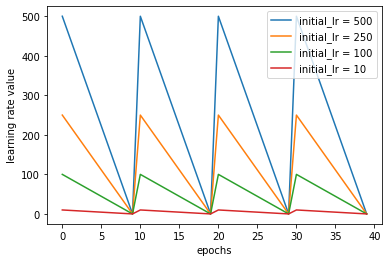

In [4]:
%matplotlib inline
simplePlot(lrSchedule(initial_lr = 500, nCycles = 4, nStepPerCycle = 10, decayFunc = None), label="initial_lr = 500")
simplePlot(lrSchedule(initial_lr = 250, nCycles = 4, nStepPerCycle = 10, decayFunc = None), label="initial_lr = 250")
simplePlot(lrSchedule(initial_lr = 100, nCycles = 4, nStepPerCycle = 10, decayFunc = None), label="initial_lr = 100")
simplePlot(lrSchedule(initial_lr = 10, nCycles = 4, nStepPerCycle = 10, decayFunc = None), label="initial_lr = 10")

#### For a linear function modulating the original saw tooth function:
Set <i>decayFunc = 'l'</i>

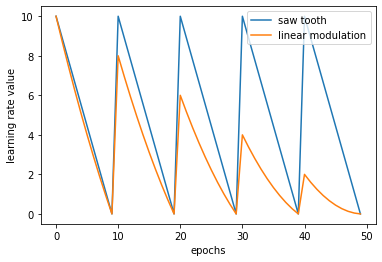

In [5]:
%matplotlib inline
lrsch001 = lrSchedule(initial_lr = 10, nCycles = 5, nStepPerCycle = 10, decayFunc = None)
lrsch002 = lrSchedule(initial_lr = 10, nCycles = 5, nStepPerCycle = 10, decayFunc = "l")
simplePlot(lrsch001, label="saw tooth")
simplePlot(lrsch002, label="linear modulation")

#### For an exponential function modulating the original saw tooth function:
Set <i>decayFunc = 'e'</i>

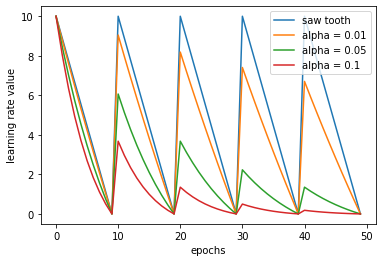

In [6]:
%matplotlib inline
lrsch003 = lrSchedule(initial_lr = 10, nCycles = 5, nStepPerCycle = 10, decayFunc = None)
lrsch004 = lrSchedule(initial_lr = 10, alpha = 0.01, nCycles = 5, nStepPerCycle = 10, decayFunc = "e")
lrsch005 = lrSchedule(initial_lr = 10, alpha = 0.05, nCycles = 5, nStepPerCycle = 10, decayFunc = "e")
lrsch006 = lrSchedule(initial_lr = 10, alpha = 0.1, nCycles = 5, nStepPerCycle = 10, decayFunc = "e")
simplePlot(lrsch003, label="saw tooth")
simplePlot(lrsch004, label="alpha = 0.01")
simplePlot(lrsch005, label="alpha = 0.05")
simplePlot(lrsch006, label="alpha = 0.1")

#### Quality control over the input parameters:

In [7]:
lrSchedule(initial_lr = 10, alpha = 0.01, nCycles = 5.1, nStepPerCycle = 10, decayFunc = "e")

The values for 'nCycles' and 'StepPerCycle' cannot be float numbers.


In [8]:
lrSchedule(initial_lr = 10, alpha = -0.01, nCycles = 5, nStepPerCycle = 10, decayFunc = "e")

Please check that the input parameters meet the specifications required.
The values for 'initial_lr', 'alpha', 'nCycles' and 'nStepPerCycle' should be greater than zero.


In [9]:
lrSchedule(initial_lr = 10, alpha = 0.01, nCycles = 5, nStepPerCycle = 10, decayFunc = "pizza")

pizza: Unknown 'decayFunc' value.
